# Statistical Analysis - 2

## Step 1 - Optimizing parameters

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression 

Using Linear regression to analyze relation between fertility and female literacy

In [27]:
female_fertility=pd.read_csv("data/female_literacy_fertility.csv")
female_fertility['illiterate percent']=100-female_fertility['female literacy']
print(female_fertility.head(5))

    Country  Continent  female literacy  fertility     population  \
0      Chine       ASI             90.5      1.769  1,324,655,000   
1       Inde       ASI             50.8      2.682  1,139,964,932   
2        USA       NAM             99.0      2.077    304,060,000   
3  Indonésie       ASI             88.8      2.132    227,345,082   
4     Brésil       LAT             90.2      1.827    191,971,506   

   illiterate percent  
0                 9.5  
1                49.2  
2                 1.0  
3                11.2  
4                 9.8  


High Correlation between illiteracy and number of kids they have
0.8041324026815343

********
slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


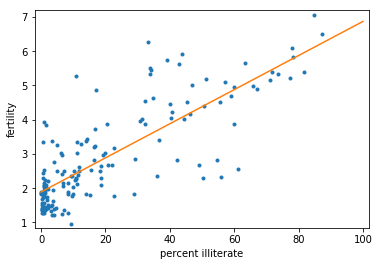

In [28]:
fertility=female_fertility['fertility']
illiteracy=female_fertility['illiterate percent']

print("High Correlation between illiteracy and number of kids they have")

print(np.corrcoef(fertility,illiteracy)[0,1])
print()
print("********")

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = np.array(x * a + b)

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

## Step 2) Bootstraping Samples

In [30]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


[0.04359617 0.05566819]


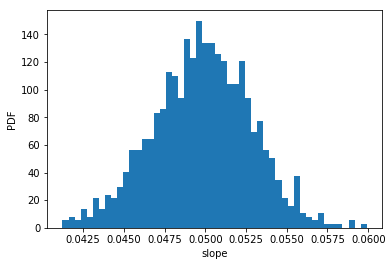

In [33]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

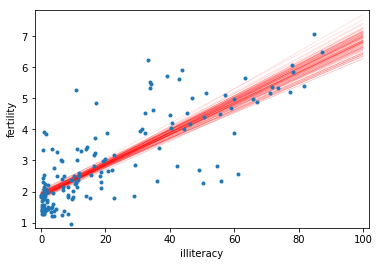

Multiple lines trying to fit the above data using bootstraping method


In [34]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()


print("Multiple lines trying to fit the above data using bootstraping method")

## Step 3) Hypothesis testing